In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y= make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

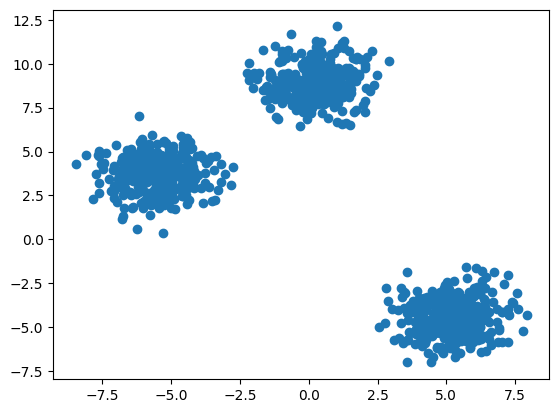

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

## manual process
## Elbow Method to select the k value

In [7]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1171.1268263171225,
 1048.7401198526406,
 953.91188089148,
 807.7537686972747,
 683.3483490910291,
 582.2715854699228,
 551.8333189812038]

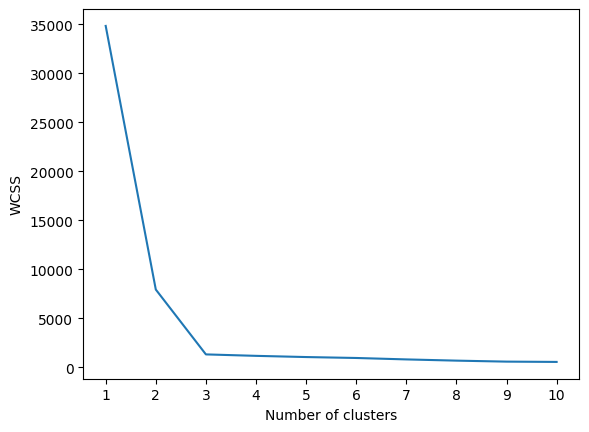

In [9]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3, init="k-means++")

In [13]:
y_labels=kmeans.fit_predict(X_train)

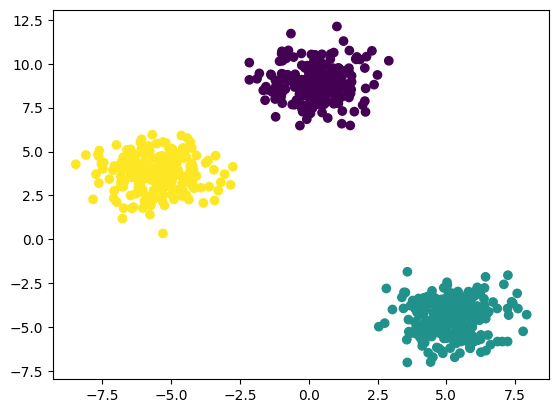

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [19]:
y_test_labels=kmeans.predict(X_test)

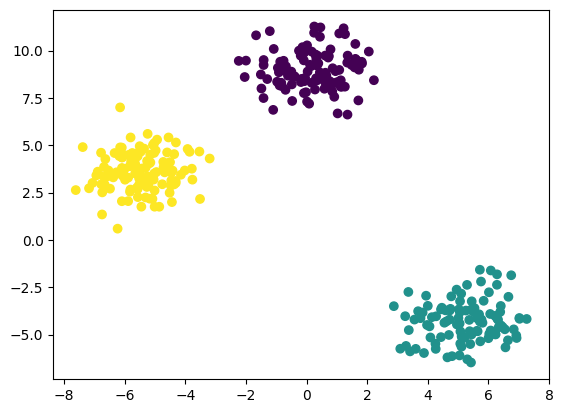

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

## knee locator

In [21]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [26]:
kl.elbow

3

In [27]:
## performance metrics

In [28]:
##silhoutte score
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [31]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.6357733426488265,
 0.474362959865786,
 0.30696494953117875,
 0.32474532874945156,
 0.33250148273574226,
 0.3424970637461691,
 0.3308544450754864]

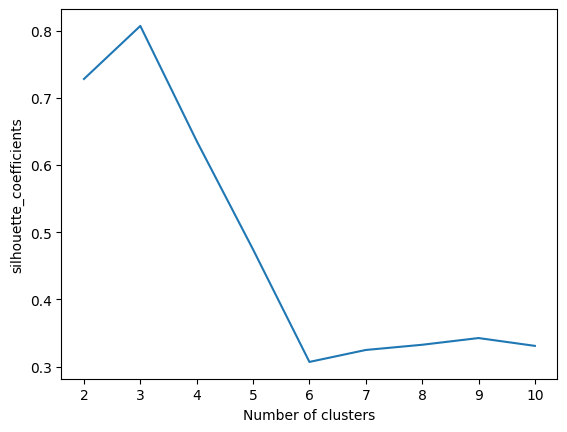

In [32]:
## plot silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()